## Option Greeks Visualizer

The objective of this project is to visualize option Greeks (Delta, Gamma, Vega, Theta, Rho) for different option types, helping users understand the sensitivities of option prices to different variables.

The code will receive many different inputs from the user such as: underlying price (S), strike price (K), time to maturity (T), risk free rate (r), volatility (σ), option type (call or put). As we go through each of the Greeks we will discuss the mathematical and finance aspect of it, along with some visualization. 

## Delta Δ

Delta measures the sensitivity of the option price to changes in the underlying asset's price. IE: A Delta of 0.7 means the option price will increase by $0.70 if the underlying price increases by $1. It ranges from 0 to 1 for calls and -1 to 0 for puts. At-the-money (ATM) options usually have a Delta of 0.5. Deep in-the-money (ITM) options approach 1 (calls) or -1 (puts). It helps with hedging as well, if you have a Delta neutral portfolio it means the position is not sensitive to small price changes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Black-Scholes Formula Components
def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    """
    Calculate Delta for European options using the Black-Scholes model.
    Parameters:
        S (float): Underlying price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility (annualized)
        option_type (str): "call" or "put"
    Returns:
        float: Delta of the option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        return norm.cdf(d1)  # Delta for a call
    elif option_type == "put":
        return norm.cdf(d1) - 1  # Delta for a put

The way to find Delta is through the Black-Scholes Model equation when we find d1, the Delta of a call is the cumalitive distrubition function of the standard normal distribution at d1. $$ d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left( r + \frac{\sigma^2}{2} \right) T}{\sigma \sqrt{T}} $$  $$\Delta_{\text{call}} = \Phi(d_1) $$ $$ \Delta_{\text{put}} = \Phi(d_1) - 1 $$

In [3]:
# Parameters
S = 28.0  # Current price of BAC stock (example)
K = 30.0  # Strike price
T = 0.5   # Time to maturity (6 months)
r = 0.05  # Risk-free interest rate (5%)
sigma = 0.25  # Volatility (25%)

In [4]:
# Calculate Delta
delta_call = black_scholes_delta(S, K, T, r, sigma, "call")
delta_put = black_scholes_delta(S, K, T, r, sigma, "put")
print(f"Delta (Call): {delta_call:.4f}")
print(f"Delta (Put): {delta_put:.4f}")

Delta (Call): 0.4363
Delta (Put): -0.5637


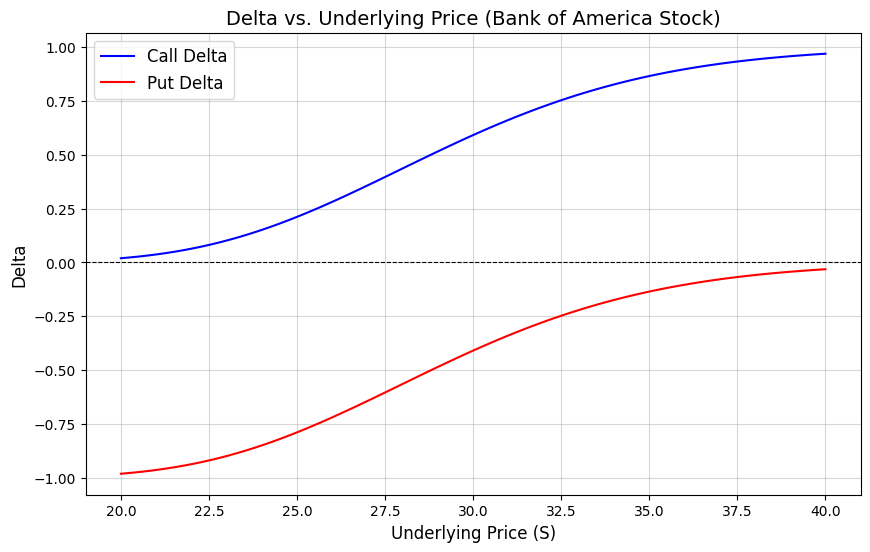

In [5]:
# Visualization: Delta vs. Underlying Price
S_range = np.linspace(20, 40, 100)  # Range of underlying prices
deltas_call = [black_scholes_delta(S_i, K, T, r, sigma, "call") for S_i in S_range]
deltas_put = [black_scholes_delta(S_i, K, T, r, sigma, "put") for S_i in S_range]
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S_range, deltas_call, label="Call Delta", color="blue")
plt.plot(S_range, deltas_put, label="Put Delta", color="red")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Delta vs. Underlying Price (Bank of America Stock)", fontsize=14)
plt.xlabel("Underlying Price (S)", fontsize=12)
plt.ylabel("Delta", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

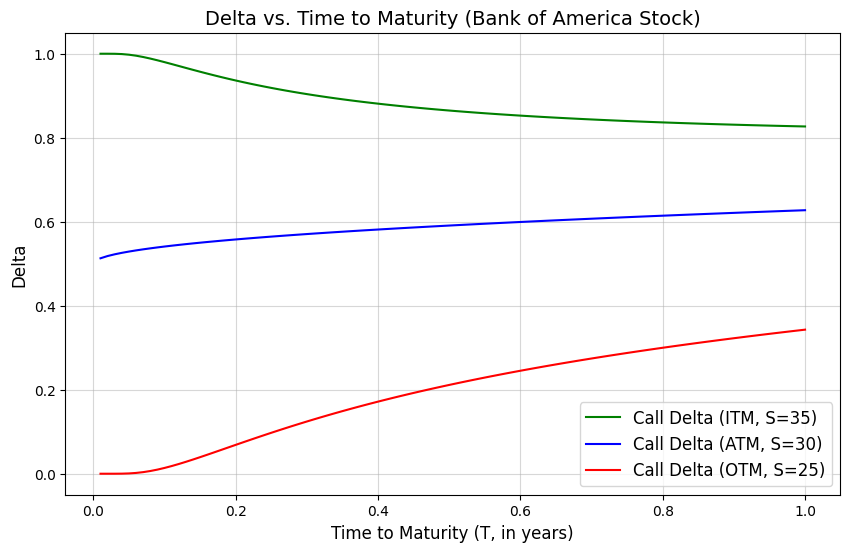

In [6]:
# Visualization: Delta vs. Time to Maturity
T_range = np.linspace(0.01, 1, 100)  # Time to maturity (1 day to 1 year)
deltas_call_ITM = [black_scholes_delta(S=35, K=30, T=T_i, r=r, sigma=sigma, option_type="call") for T_i in T_range]
deltas_call_ATM = [black_scholes_delta(S=30, K=30, T=T_i, r=r, sigma=sigma, option_type="call") for T_i in T_range]
deltas_call_OTM = [black_scholes_delta(S=25, K=30, T=T_i, r=r, sigma=sigma, option_type="call") for T_i in T_range]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_range, deltas_call_ITM, label="Call Delta (ITM, S=35)", color="green")
plt.plot(T_range, deltas_call_ATM, label="Call Delta (ATM, S=30)", color="blue")
plt.plot(T_range, deltas_call_OTM, label="Call Delta (OTM, S=25)", color="red")
plt.title("Delta vs. Time to Maturity (Bank of America Stock)", fontsize=14)
plt.xlabel("Time to Maturity (T, in years)", fontsize=12)
plt.ylabel("Delta", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## Gamma (Γ)

Gamma measures the rate of change of Delta with respect to the underlying price. IE: A Gamma of 0.02 means Delta will change by 0.02 for every $1 change in the underlying price. Gamma is the highest for at-the-money options, and at the lowest for deep in- or out-of-the money options. A high Gamma means the option price is highly sensitive to changes in the underlying price. It affects how quickly Delta moves, making it crucial for dynamic hedging adjustments. 

In [7]:
def black_scholes_gamma(S, K, T, r, sigma):
    """
    Calculate Gamma for European options using the Black-Scholes model.
    Parameters:
        S (float): Underlying price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility (annualized)
    Returns:
        float: Gamma of the option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

The Gamma is represented by $$ \Gamma = \frac{\phi(d_1)}{S \sigma \sqrt{T}} $$

In [8]:
# Calculate Gamma for a specific set of parameters
gamma_call = black_scholes_gamma(S, K, T, r, sigma)
gamma_put = black_scholes_gamma(S, K, T, r, sigma)

# Print Gamma for both call and put
print(f"Gamma (Call): {gamma_call:.4f}")
print(f"Gamma (Put): {gamma_put:.4f}")

Gamma (Call): 0.0796
Gamma (Put): 0.0796


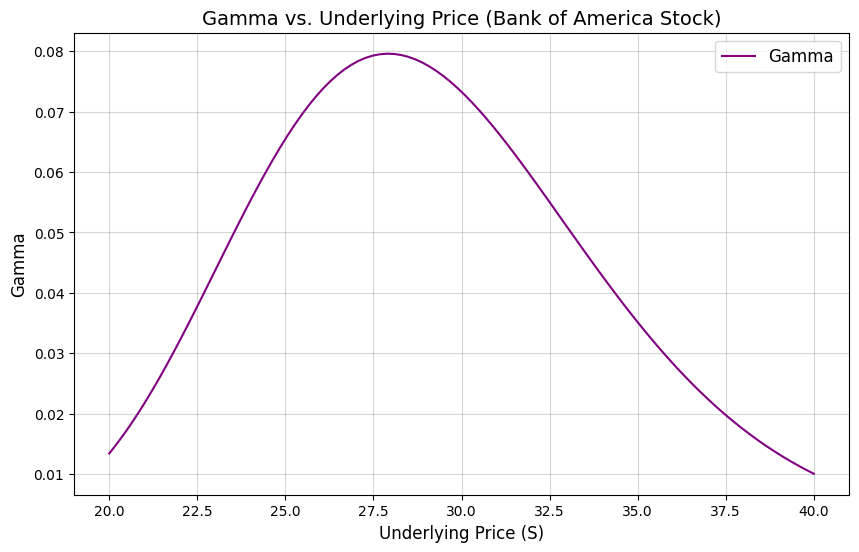

In [9]:
# Visualization: Gamma vs. Underlying Price
S_range = np.linspace(20, 40, 100)  # Range of underlying prices
gammas = [black_scholes_gamma(S_i, K, T, r, sigma) for S_i in S_range]

# Plot Gamma vs. Underlying Price
plt.figure(figsize=(10, 6))
plt.plot(S_range, gammas, label="Gamma", color="purple")
plt.title("Gamma vs. Underlying Price (Bank of America Stock)", fontsize=14)
plt.xlabel("Underlying Price (S)", fontsize=12)
plt.ylabel("Gamma", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

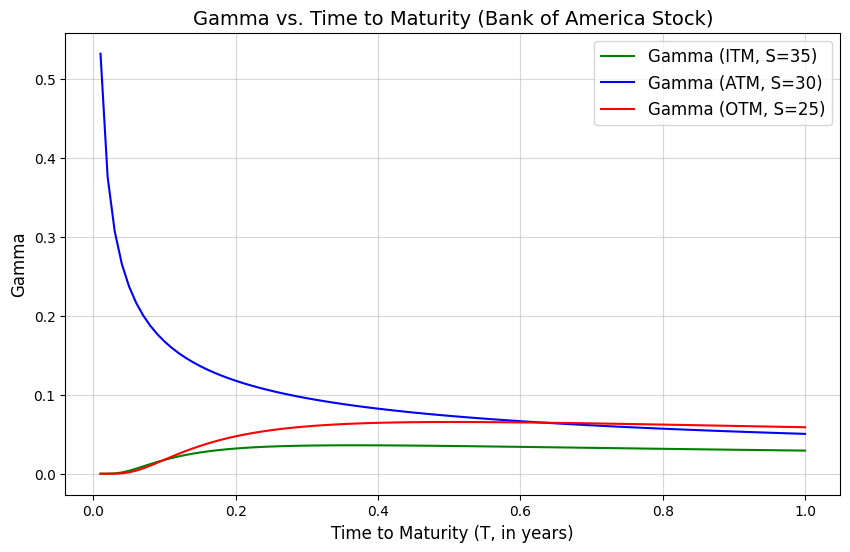

In [10]:
# Visualization: Gamma vs. Time to Maturity
T_range = np.linspace(0.01, 1, 100)  # Time to maturity (1 day to 1 year)
gammas_call_ITM = [black_scholes_gamma(S=35, K=30, T=T_i, r=r, sigma=sigma) for T_i in T_range]
gammas_call_ATM = [black_scholes_gamma(S=30, K=30, T=T_i, r=r, sigma=sigma) for T_i in T_range]
gammas_call_OTM = [black_scholes_gamma(S=25, K=30, T=T_i, r=r, sigma=sigma) for T_i in T_range]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_range, gammas_call_ITM, label="Gamma (ITM, S=35)", color="green")
plt.plot(T_range, gammas_call_ATM, label="Gamma (ATM, S=30)", color="blue")
plt.plot(T_range, gammas_call_OTM, label="Gamma (OTM, S=25)", color="red")
plt.title("Gamma vs. Time to Maturity (Bank of America Stock)", fontsize=14)
plt.xlabel("Time to Maturity (T, in years)", fontsize=12)
plt.ylabel("Gamma", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## Vega (ν)

Vega measures the sensitivity of the option price to changes in volitality. IE: a Vega of 0.20 means the option price will increase by $0.20 if volitality increases by 1%. It is higher for options that are at-the-money and with longer time to maturity. Vega is the same for both calls and puts of the same strike price and maturity. Volitality changes (IE during earnings or macroeconomic events) have a significant impact on Vega. It is key for volatility trading strategies: Vega-neutral portfolios are constructed to reduce sensitivity to volatility. 

In [11]:
# Vega Calculation Function
def black_scholes_vega(S, K, T, r, sigma):
    """
    Calculate Vega for European options using the Black-Scholes model.
    Parameters:
        S (float): Underlying price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility (annualized)
    Returns:
        float: Vega of the option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    return vega

Vega is represented by: $$ \text{Vega} = S \phi(d_1) \sqrt{T} $$

In [12]:
# Calculate Vega for Call and Put
vega_call = black_scholes_vega(S, K, T, r, sigma)
vega_put = black_scholes_vega(S, K, T, r, sigma)

# Print Vega for both call and put
print(f"Vega (Call): {vega_call:.4f}")
print(f"Vega (Put): {vega_put:.4f}")

Vega (Call): 7.7976
Vega (Put): 7.7976


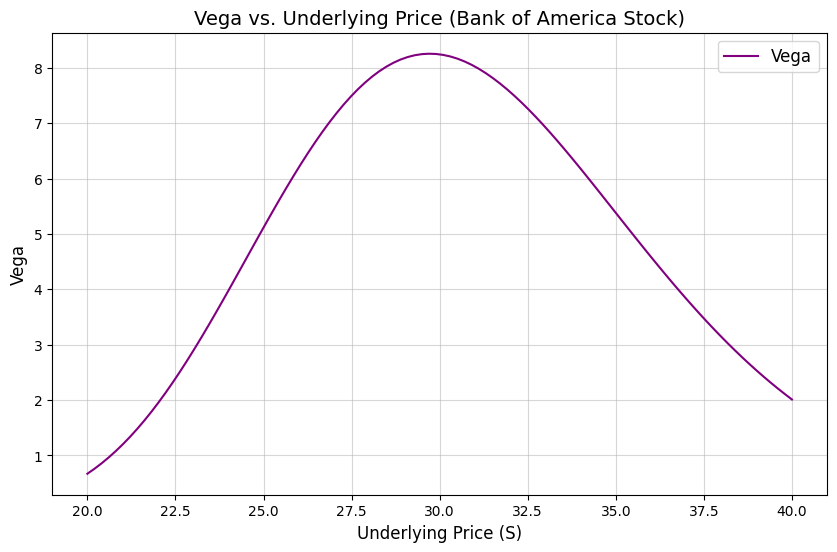

In [13]:
# Visualization: Vega vs. Underlying Price
S_range = np.linspace(20, 40, 100)  # Range of underlying prices
vegas = [black_scholes_vega(S_i, K, T, r, sigma) for S_i in S_range]

# Plot Vega vs. Underlying Price
plt.figure(figsize=(10, 6))
plt.plot(S_range, vegas, label="Vega", color="purple")
plt.title("Vega vs. Underlying Price (Bank of America Stock)", fontsize=14)
plt.xlabel("Underlying Price (S)", fontsize=12)
plt.ylabel("Vega", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

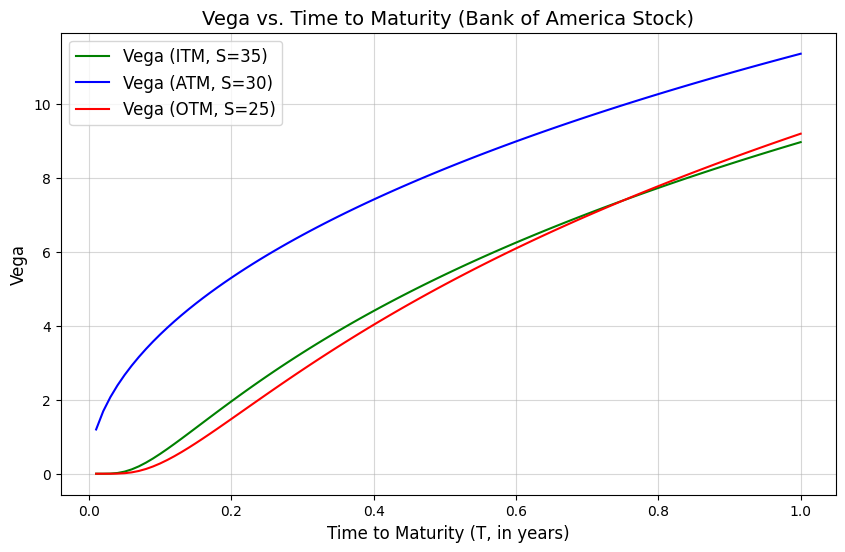

In [14]:
# Visualization: Vega vs. Time to Maturity
T_range = np.linspace(0.01, 1, 100)  # Time to maturity (1 day to 1 year)
vegas_call_ITM = [black_scholes_vega(S=35, K=30, T=T_i, r=r, sigma=sigma) for T_i in T_range]
vegas_call_ATM = [black_scholes_vega(S=30, K=30, T=T_i, r=r, sigma=sigma) for T_i in T_range]
vegas_call_OTM = [black_scholes_vega(S=25, K=30, T=T_i, r=r, sigma=sigma) for T_i in T_range]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_range, vegas_call_ITM, label="Vega (ITM, S=35)", color="green")
plt.plot(T_range, vegas_call_ATM, label="Vega (ATM, S=30)", color="blue")
plt.plot(T_range, vegas_call_OTM, label="Vega (OTM, S=25)", color="red")
plt.title("Vega vs. Time to Maturity (Bank of America Stock)", fontsize=14)
plt.xlabel("Time to Maturity (T, in years)", fontsize=12)
plt.ylabel("Vega", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## Theta (Θ)

Theta measures the sensitivity of the option price to the passage of time (time decay). IE: a Theta of -0.05 means the option loses $0.05 in value per day, assuming all else is constant. It is always negative for long options (time can work against buyers) but positive for sellers. At-the-money options experience the highest time decay as expiry nears. This is important for options nearing expiry, as traders must decide whether to close or roll their positions. 

In [15]:
# Theta Calculation Function
def black_scholes_theta(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Theta for European options using the Black-Scholes model.
    Parameters:
        S (float): Underlying price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility (annualized)
        option_type (str): 'call' for call option, 'put' for put option
    Returns:
        float: Theta of the option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        theta = (-S * sigma * norm.pdf(d1) / (2 * np.sqrt(T)) 
                 - r * K * np.exp(-r * T) * norm.cdf(d2))
    elif option_type == 'put':
        theta = (-S * sigma * norm.pdf(d1) / (2 * np.sqrt(T)) 
                 + r * K * np.exp(-r * T) * norm.cdf(-d2))
    
    return theta


Theta is represented by $$ \Theta_{\text{call}} = -\frac{S \phi(d_1) \sigma}{2 \sqrt{T}} - r K e^{-rT} \Phi(d_2) $$ $$\Theta_{\text{put}} = -\frac{S \phi(d_1) \sigma}{2 \sqrt{T}} + r K e^{-rT} \Phi(-d_2) $$

In [16]:
# Calculate Theta for Call and Put
theta_call = black_scholes_theta(S, K, T, r, sigma, option_type='call')
theta_put = black_scholes_theta(S, K, T, r, sigma, option_type='put')

# Print Theta for both call and put
print(f"Theta (Call): {theta_call:.4f}")
print(f"Theta (Put): {theta_put:.4f}")

Theta (Call): -2.4877
Theta (Put): -1.0248


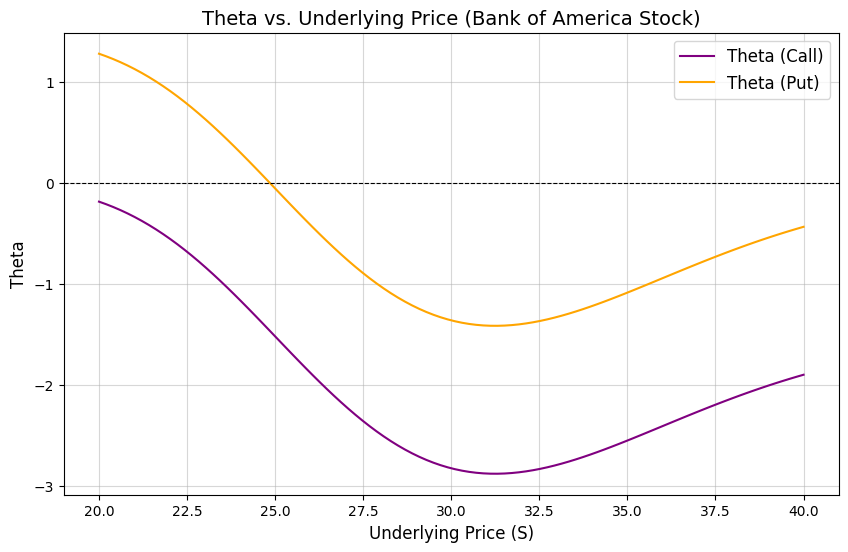

In [17]:
# Visualization: Theta vs. Underlying Price
S_range = np.linspace(20, 40, 100)  # Range of underlying prices
thetas_call = [black_scholes_theta(S_i, K, T, r, sigma, option_type='call') for S_i in S_range]
thetas_put = [black_scholes_theta(S_i, K, T, r, sigma, option_type='put') for S_i in S_range]

# Plot Theta vs. Underlying Price
plt.figure(figsize=(10, 6))
plt.plot(S_range, thetas_call, label="Theta (Call)", color="purple")
plt.plot(S_range, thetas_put, label="Theta (Put)", color="orange")
plt.title("Theta vs. Underlying Price (Bank of America Stock)", fontsize=14)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("Underlying Price (S)", fontsize=12)
plt.ylabel("Theta", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

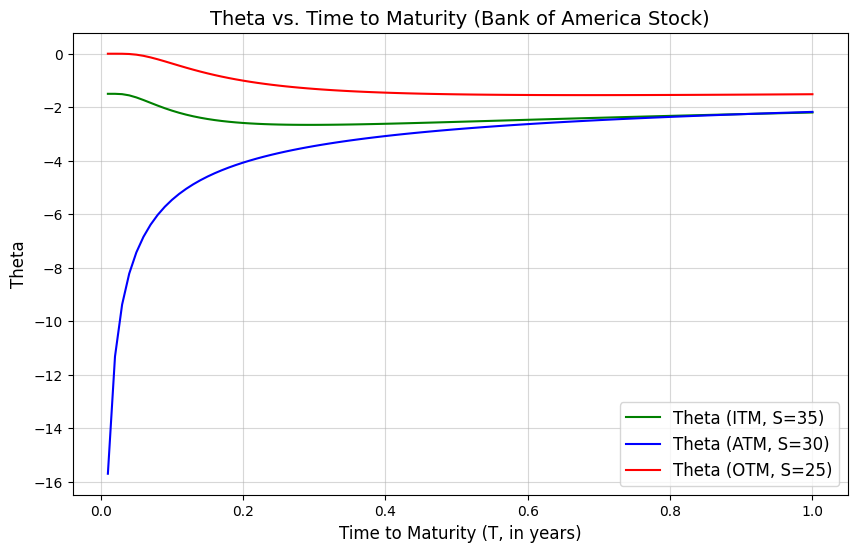

In [18]:
# Visualization: Theta vs. Time to Maturity
T_range = np.linspace(0.01, 1, 100)  # Time to maturity (1 day to 1 year)
thetas_call_ITM = [black_scholes_theta(S=35, K=30, T=T_i, r=r, sigma=sigma, option_type='call') for T_i in T_range]
thetas_call_ATM = [black_scholes_theta(S=30, K=30, T=T_i, r=r, sigma=sigma, option_type='call') for T_i in T_range]
thetas_call_OTM = [black_scholes_theta(S=25, K=30, T=T_i, r=r, sigma=sigma, option_type='call') for T_i in T_range]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_range, thetas_call_ITM, label="Theta (ITM, S=35)", color="green")
plt.plot(T_range, thetas_call_ATM, label="Theta (ATM, S=30)", color="blue")
plt.plot(T_range, thetas_call_OTM, label="Theta (OTM, S=25)", color="red")
plt.title("Theta vs. Time to Maturity (Bank of America Stock)", fontsize=14)
plt.xlabel("Time to Maturity (T, in years)", fontsize=12)
plt.ylabel("Theta", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

## Rho (𝜌)

Rho measures the sensitivity of the option price to changes in the risk-free interest rate. IE: A Rho of 0.03 means the option price will increase by $0.03 if interest rates increase by 1%. Call options have a positive Rho, while put options have negative Rho. Rho has a more significant impact on longer-term options and is negligible for short-term options. It is extremely important during periods of fluctating interest rates, such as central bank announcments. 

In [19]:
# Rho Calculation Function
def black_scholes_rho(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Rho for European options using the Black-Scholes model.
    Parameters:
        S (float): Underlying price
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate
        sigma (float): Volatility (annualized)
        option_type (str): 'call' for call option, 'put' for put option
    Returns:
        float: Rho of the option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)  # Rho for call
    elif option_type == 'put':
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)  # Rho for put
    
    return rho

Rho is represented by: $$ \rho_{\text{call}} = K T e^{-rT} \Phi(d_2) $$ $$ \rho_{\text{put}} = -K T e^{-rT} \Phi(-d_2) $$

In [20]:
# Calculate Rho for Call and Put
rho_call = black_scholes_rho(S, K, T, r, sigma, option_type='call')
rho_put = black_scholes_rho(S, K, T, r, sigma, option_type='put')

# Print Rho for both call and put
print(f"Rho (Call): {rho_call:.4f}")
print(f"Rho (Put): {rho_put:.4f}")

Rho (Call): 5.3832
Rho (Put): -9.2465


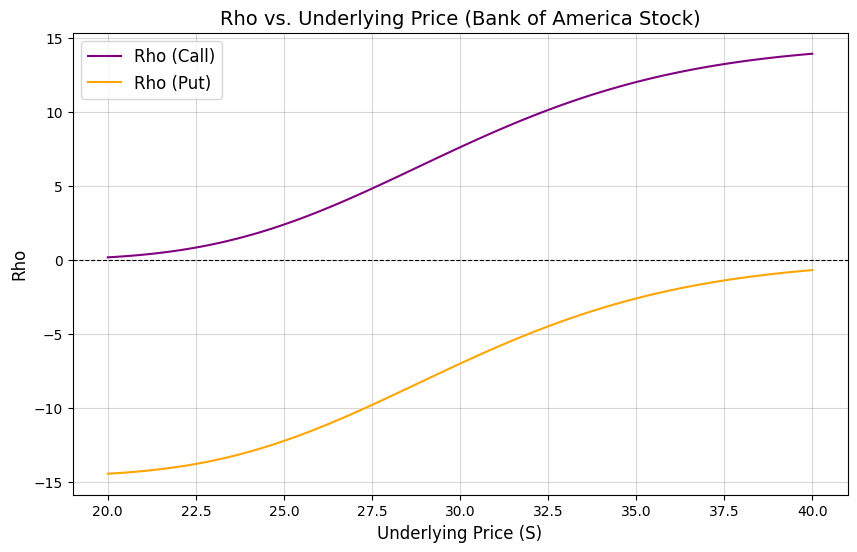

In [21]:
# Visualization: Rho vs. Underlying Price
S_range = np.linspace(20, 40, 100)  # Range of underlying prices
rhos_call = [black_scholes_rho(S_i, K, T, r, sigma, option_type='call') for S_i in S_range]
rhos_put = [black_scholes_rho(S_i, K, T, r, sigma, option_type='put') for S_i in S_range]

# Plot Rho vs. Underlying Price
plt.figure(figsize=(10, 6))
plt.plot(S_range, rhos_call, label="Rho (Call)", color="purple")
plt.plot(S_range, rhos_put, label="Rho (Put)", color="orange")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Rho vs. Underlying Price (Bank of America Stock)", fontsize=14)
plt.xlabel("Underlying Price (S)", fontsize=12)
plt.ylabel("Rho", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

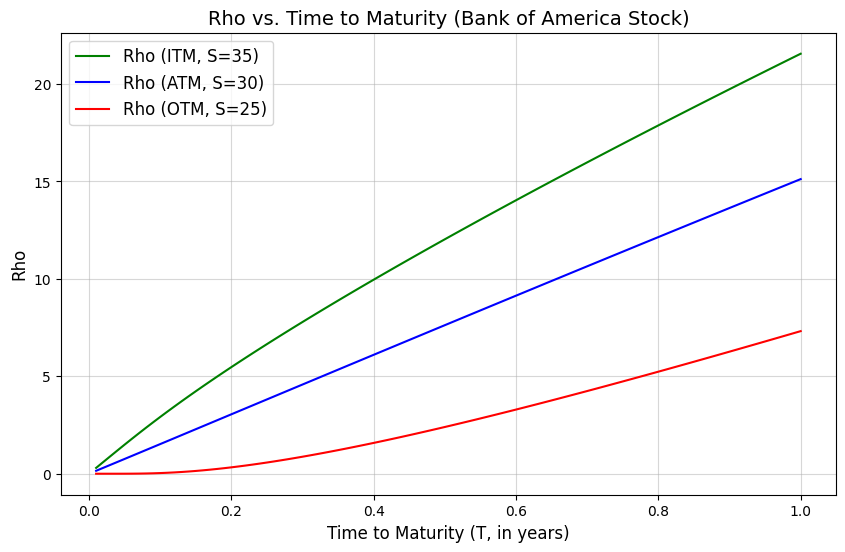

In [22]:
# Visualization: Rho vs. Time to Maturity
T_range = np.linspace(0.01, 1, 100)  # Time to maturity (1 day to 1 year)
rhos_call_ITM = [black_scholes_rho(S=35, K=30, T=T_i, r=r, sigma=sigma, option_type='call') for T_i in T_range]
rhos_call_ATM = [black_scholes_rho(S=30, K=30, T=T_i, r=r, sigma=sigma, option_type='call') for T_i in T_range]
rhos_call_OTM = [black_scholes_rho(S=25, K=30, T=T_i, r=r, sigma=sigma, option_type='call') for T_i in T_range]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T_range, rhos_call_ITM, label="Rho (ITM, S=35)", color="green")
plt.plot(T_range, rhos_call_ATM, label="Rho (ATM, S=30)", color="blue")
plt.plot(T_range, rhos_call_OTM, label="Rho (OTM, S=25)", color="red")
plt.title("Rho vs. Time to Maturity (Bank of America Stock)", fontsize=14)
plt.xlabel("Time to Maturity (T, in years)", fontsize=12)
plt.ylabel("Rho", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()